In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
len(data)

891

In [25]:
didTheySurvive = data.Survived == 1
female = data.Sex == "female"
testFrame = data[didTheySurvive]
len(testFrame)

342

In [43]:
under25 = data.Age <= 25.0
didTheySurvive = data.Survived == 1
female = data.Sex == "male"
testFrame = data[female & didTheySurvive]
print(len(testFrame) / len(data))


0.122334455667789


In [31]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [100]:
testSet = data.SibSp.value_counts()
for count in data.SibSp.value_counts():
    print(testSet[:count])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64


In [5]:
# so far survival data appears to favor upper class women with fewer/no siblings/spouses
sibSp = data.SibSp.value_counts()
firstClass = data.Pclass == 1
survived = data.Survived == 1
isFemale = data.Sex == "female"
maxIndex = len(sibSp)
currentIndex = 0

while currentIndex < maxIndex:
    sca = data.SibSp == sibSp.index[currentIndex]
    print(len(data[isFemale & firstClass & survived & sca]))
    currentIndex += 1

48
38
3
0
2
0
0


In [6]:
corr_matrix=data.corr()

In [13]:
corr_matrix["Sex"].sort_values(ascending=False)

KeyError: 'Sex'

In [106]:
# so far survival data appears to favor upper class women with fewer/no children
firstClass = data.Pclass == 1
survived = data.Survived == 1
isFemale = data.Sex == "female"
sca = data.SibSp == 0


print(len(data[isFemale & firstClass & survived & sca]))

48


In [8]:
data_transpose = data.head().T

In [9]:
data_transpose

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
training_set = data.copy()

In [4]:
training_set.columns = ['PassengerId', 'Survived', 'Ticket Class', 'Name', 'Sex', 'Age', 'Spouses Siblings Aboard',
       'Parents Children Aboard', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [5]:
training_set.columns = training_set.columns.str.lower().str.replace(' ', '_')
string_columns = list(training_set.dtypes[training_set.dtypes == 'object'].index)
for col in string_columns:
    training_set[col] = training_set[col].str.lower().str.replace(' ', '_')

In [6]:
training_set.head(10)

,passengerid,survived,ticket_class,name,sex,age,spouses_siblings_aboard,parents_children_aboard,ticket,fare,cabin,embarked
0,1,0,3,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,NaN,s
1,2,1,1,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c
2,3,1,3,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,NaN,s
3,4,1,1,"futrelle,_mrs._jacques_heath_(lily_may_peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen,_mr._william_henry",male,35.0,0,0,373450,8.0500,NaN,s
5,6,0,3,"moran,_mr._james",male,NaN,0,0,330877,8.4583,NaN,q
6,7,0,1,"mccarthy,_mr._timothy_j",male,54.0,0,0,17463,51.8625,e46,s
7,8,0,3,"palsson,_master._gosta_leonard",male,2.0,3,1,349909,21.0750,NaN,s
8,9,1,3,"johnson,_mrs._oscar_w_(elisabeth_vilhelmina_berg)",female,27.0,0,2,347742,11.1333,NaN,s
9,10,1,2,"nasser,_mrs._nicholas_(adele_achem)",female,14.0,1,0,237736,30.0708,NaN,c


In [7]:
training_set.isnull().sum()

passengerid                  0
survived                     0
ticket_class                 0
name                         0
sex                          0
age                        177
spouses_siblings_aboard      0
parents_children_aboard      0
ticket                       0
fare                         0
cabin                      687
embarked                     2
dtype: int64

In [8]:
# First Class = A, B, C
# Second Class = D, E, F
# Third Class = Most on F, Some on G
# Decks go from A-G top to bottom
training_set.cabin.values

array([nan, 'c85', nan, 'c123', nan, nan, 'e46', nan, nan, nan, 'g6',
       'c103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'd56', nan,
       'a6', nan, nan, nan, 'c23_c25_c27', nan, nan, nan, 'b78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'd33', nan, 'b30', 'c52', nan, nan, nan,
       nan, nan, 'b28', 'c83', nan, nan, nan, 'f33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'f_g73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'c23_c25_c27', nan, nan, nan, 'e31', nan,
       nan, nan, 'a5', 'd10_d12', nan, nan, nan, nan, 'd26', nan, nan,
       nan, nan, nan, nan, nan, 'c110', nan, nan, nan, nan, nan, nan, nan,
       'b58_b60', nan, nan, nan, nan, 'e101', 'd26', nan, nan, nan,
       'f_e69', nan, nan, nan, nan, nan, nan, nan, 'd47', 'c123', nan,
       'b86', nan, nan, nan, nan, nan, nan, nan, nan, 'f2', nan, nan,
       'c2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [9]:
training_set.head(10)

,passengerid,survived,ticket_class,name,sex,age,spouses_siblings_aboard,parents_children_aboard,ticket,fare,cabin,embarked
0,1,0,3,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,NaN,s
1,2,1,1,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c
2,3,1,3,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,NaN,s
3,4,1,1,"futrelle,_mrs._jacques_heath_(lily_may_peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen,_mr._william_henry",male,35.0,0,0,373450,8.0500,NaN,s
5,6,0,3,"moran,_mr._james",male,NaN,0,0,330877,8.4583,NaN,q
6,7,0,1,"mccarthy,_mr._timothy_j",male,54.0,0,0,17463,51.8625,e46,s
7,8,0,3,"palsson,_master._gosta_leonard",male,2.0,3,1,349909,21.0750,NaN,s
8,9,1,3,"johnson,_mrs._oscar_w_(elisabeth_vilhelmina_berg)",female,27.0,0,2,347742,11.1333,NaN,s
9,10,1,2,"nasser,_mrs._nicholas_(adele_achem)",female,14.0,1,0,237736,30.0708,NaN,c


In [30]:
len(testFrame)

342

In [20]:
training_set.survived[training_set.survived == 1].sum()

342

In [21]:
ordinal_encoder = OrdinalEncoder()

In [22]:
training_set.name.describe()

count                              891
unique                             891
top       walker,_mr._william_anderson
freq                                 1
Name: name, dtype: object

In [23]:
training_set.ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: ticket, dtype: object

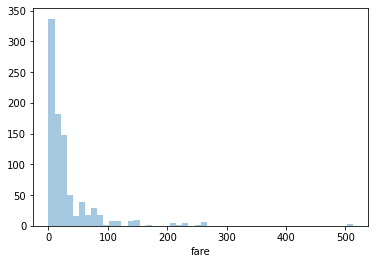

In [24]:
sns.distplot(training_set.fare, kde=False)

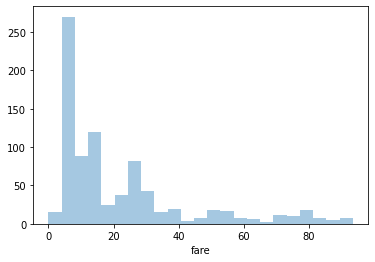

In [25]:
sns.distplot(training_set.fare[training_set.fare <= 100.00], kde=False)

In [26]:
fare_log = np.log1p(training_set.fare)

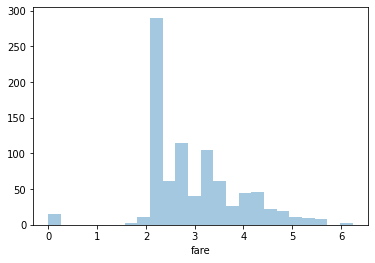

In [27]:
sns.distplot(fare_log, kde=False)

In [28]:
training_set.drop(columns=["name", "ticket"])

,passengerid,survived,ticket_class,sex,age,spouses_siblings_aboard,parents_children_aboard,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,s
1,2,1,1,female,38.0,1,0,71.2833,c85,c
2,3,1,3,female,26.0,0,0,7.9250,NaN,s
3,4,1,1,female,35.0,1,0,53.1000,c123,s
4,5,0,3,male,35.0,0,0,8.0500,NaN,s
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,s
887,888,1,1,female,19.0,0,0,30.0000,b42,s
888,889,0,3,female,NaN,1,2,23.4500,NaN,s
889,890,1,1,male,26.0,0,0,30.0000,c148,c


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce620c3790>,
      dtype=object)

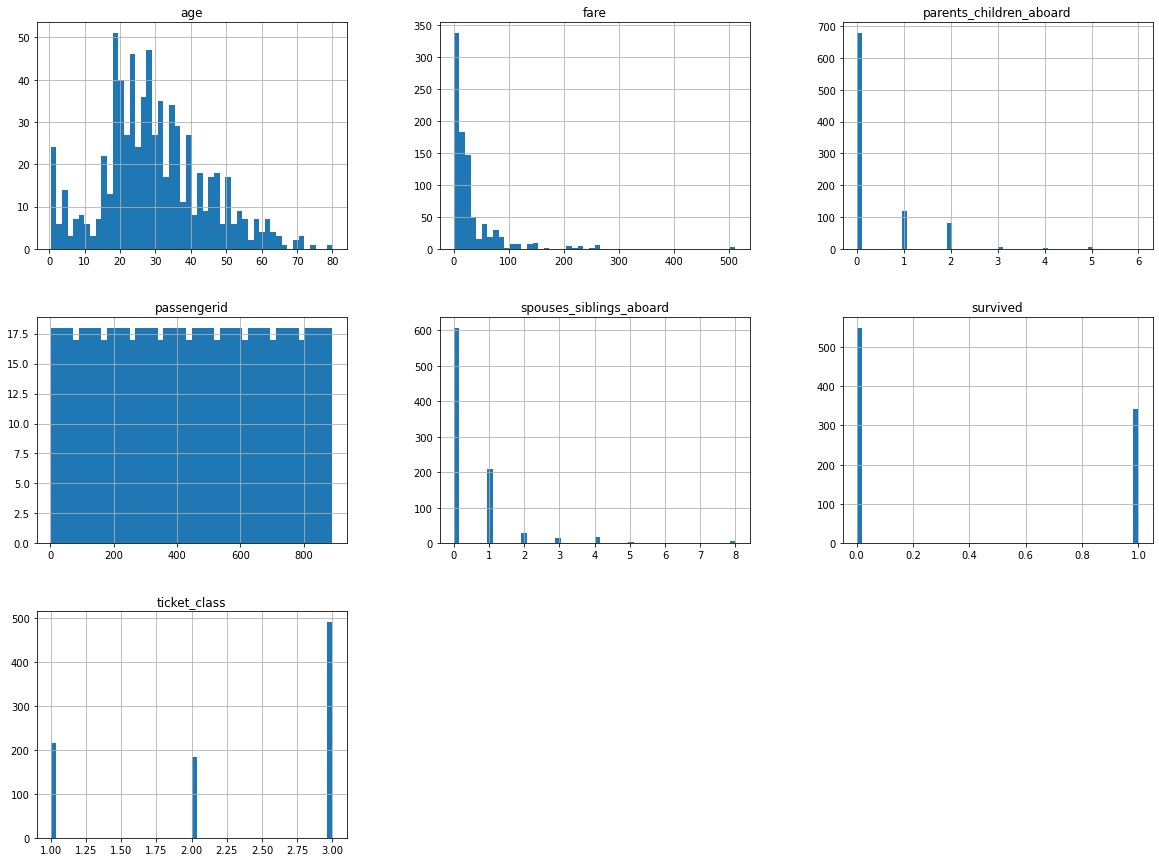

In [29]:
training_set.hist(bins=50, figsize=(20,15))

In [30]:
training_set.ticket_class.value_counts()

3    491
1    216
2    184
Name: ticket_class, dtype: int64

In [31]:
training_set.describe()

,passengerid,survived,ticket_class,age,spouses_siblings_aboard,parents_children_aboard,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
training_set.cabin = training_set.cabin.str.replace(r'[a|b|c][0-9]+', "first_class", regex=True)

In [33]:
training_set.head(5)

,passengerid,survived,ticket_class,name,sex,age,spouses_siblings_aboard,parents_children_aboard,ticket,fare,cabin,embarked
0,1,0,3,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,NaN,s
1,2,1,1,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,first_class,c
2,3,1,3,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,NaN,s
3,4,1,1,"futrelle,_mrs._jacques_heath_(lily_may_peel)",female,35.0,1,0,113803,53.1000,first_class,s
4,5,0,3,"allen,_mr._william_henry",male,35.0,0,0,373450,8.0500,NaN,s


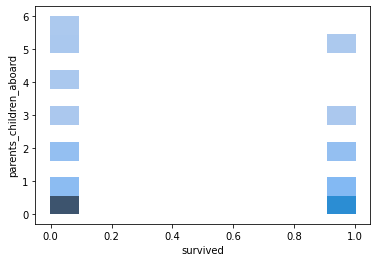

In [78]:
sns.histplot(data=training_set, x="survived", y="parents_children_aboard")